In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Solving as an ODE

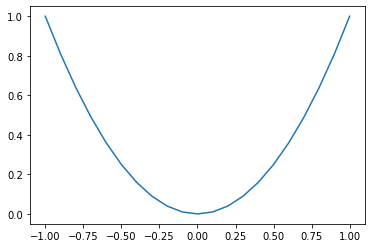

In [3]:
dx = 0.1
L = 1.0
x = np.arange(-L, L+dx, dx)

def harmonic_potential(x):
    return x**2

plt.plot(x, harmonic_potential(x))
plt.show()

\begin{equation}
-\frac{\hbar^2}{2m} \frac{d^2 \psi}{dx^2} + V(x)\psi = E \psi
\end{equation}

\begin{equation}
\frac{d^2 \psi}{dx^2} - \frac{2m}{\hbar^2}(V(x) - E)\psi = 0
\end{equation}

\begin{equation}
\frac{d^2 \psi}{dx^2} + (\epsilon - \cal{V})\psi = 0
\end{equation}

\begin{equation}
\frac{d^2 \psi}{dx^2} = (\cal{V} - \epsilon)\psi 
\end{equation}

\begin{align}
\frac{d \psi}{dx} &= \psi' \\
\frac{d \psi'}{dx} &= (\cal{V} - \epsilon)\psi 
\end{align}


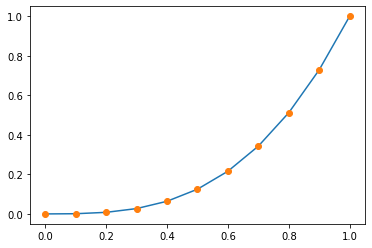

In [24]:
# Testing solve_ivp for a first order ODE

from scipy.integrate import solve_ivp

dt = 0.1
t = np.arange(0, 1+dt, dt)

def f(t, y, a):
    return a*t**2

a = 3.0

sol = solve_ivp(f, t_span=(0,1), y0=[0], t_eval=t, args=[a])
y = sol.y[0]

plt.plot(t, a*(t**3)/3)
plt.plot(t, y, marker='o', ls='')
plt.show()

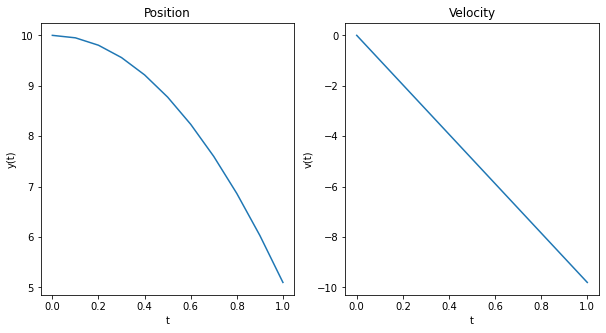

In [32]:
# Testing solve_ivp for a second order ODE

def f(t, yv):
    g = 9.8
    y, v = yv
    dy_dt = v
    dv_dt = -g
    return dy_dt, dv_dt

dt = 0.1
t = np.arange(0, 1+dt, dt)

sol = solve_ivp(f, t_span=(0,1), y0=[10, 0], t_eval=t)
y, v = sol.y  


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Position')

plt.subplot(1,2,2)
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('v(t)')
plt.title('Velocity')
plt.show()